In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-305-g4456c953 Python-3.10.12 torch-2.2.1+cu121 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/107.7 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#vuEJRGEcKHcw4NtTMN2PCuatt
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'ClearML', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).


In [ ]:
!python train.py --img 320 --batch 8 --cache disk --epochs 3 --data '/content/gdrive/MyDrive/helmet320/data.yaml' --weights yolov5s.pt --cache
#<class> <x_center> <y_center> <width> <height> class 0 = with helmet /content/gdrive/MyDrive/archive (1)/images

2024-04-28 10:48:21.717349: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-28 10:48:21.717467: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-28 10:48:21.720394: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/gdrive/MyDrive/helmet320/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=8, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale

In [ ]:
import cv2
import torch
from pathlib import Path
# Assuming your model is saved as 'best.pt' in the current directory
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt')


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-305-g4456c953 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 320 --conf 0.25 --source /content/gdrive/MyDrive/helmet320/test/images/BikesHelmets100_png.rf.915e5fb579e68da1a24394690e230913.jpg --line-thickness 5 --hide-labels

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/gdrive/MyDrive/helmet320/test/images/BikesHelmets100_png.rf.915e5fb579e68da1a24394690e230913.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=5, hide_labels=True, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-305-g4456c953 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/gdrive/MyDrive/helmet320/test/images/BikesHelmets100_png.rf.915e5fb579e68da1a24394690e230913.jpg: 320x320 2 With Helmets, 137.2ms
Speed: 2.9ms pre-process, 137.2ms inference, 1.3ms NMS per image at shape (1, 3, 320, 320)
Results save

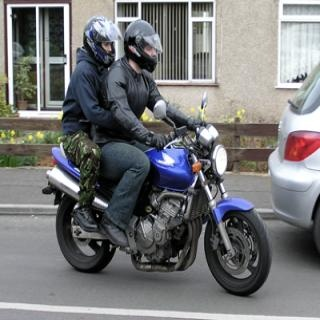

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Read the image
img = cv2.imread('/content/yolov5/runs/detect/exp/BikesHelmets100_png.rf.915e5fb579e68da1a24394690e230913.jpg')

# Display the image
cv2_imshow(img)

Image has 3 channels.
Image shape after loading: (320, 320, 3)
tensor([[168.22281,  89.61379, 186.82227, 106.10192,   0.25371,   0.00000]])
[tensor(168.22281), tensor(89.61379), tensor(186.82227), tensor(106.10192)]
image 1/1: 320x320 1 With Helmet
Speed: 4.9ms pre-process, 563.9ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)


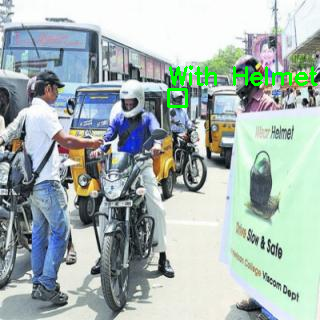

In [ ]:
def detect_and_draw_bboxes(image_path):
    # Load the image
    img = cv2.imread(image_path)
    print(f"Image shape after loading: {img.shape}")

    results = model(img)

    # Get detections
    detections = results.xyxy[0]  # xyxy format
    print(detections)

    # Draw bounding boxes
    for *box, conf, class_id in detections:
        if conf >= 0.1:  # Only draw boxes with confidence score above 0.5 (adjust threshold as needed)
            x_min, y_min, x_max, y_max = box
            print(box)
            class_label = model.names[int(class_id)]  # Get class label from model.names

            cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)  # Green for helmets
            cv2.putText(img, f"{class_label} ({conf:.2f})", (int(x_min), int(y_min) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    return img
from google.colab.patches import cv2_imshow
image_path = '/content/gdrive/MyDrive/helmet320/test/images/BikesHelmets173_png.rf.8c1e661c67c83a54e913c60d06200682.jpg'  # Replace with your image path
img = cv2.imread(image_path)
num_channels = img.shape[2]
print(f"Image has {num_channels} channels.")
# Detect and draw bounding boxes
result_image = detect_and_draw_bboxes(image_path)
img = cv2.imread(image_path)

results = model(img)
print(results)
# Display the image with bounding boxes (optional)
cv2_imshow(result_image)



In [ ]:
!python val.py --weights /content/yolov5/runs/train/exp/weights/best.pt --data '/content/gdrive/MyDrive/helmet320/data.yaml' --img-size 320
#!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 320 --conf 0.25 --source /content/gdrive/MyDrive/helmet320/test/images/BikesHelmets100_png.rf.915e5fb579e68da1a24394690e230913.jpg --line-thickness 5 --hide-labels

val: data=/content/gdrive/MyDrive/helmet320/data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-305-g4456c953 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/content/yolov5/val.py", line 438, in <module>
    main(opt)
  File "/content/yolov5/val.py", line 409, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/val.py", line 192, in run
    assert ncm == nc, (
AssertionError: ['/content/yolov5/runs/train/exp/weigh